# Loan Prediction Problem

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

## **Data Exploration**

In [3]:
# Read input train data
df = pd.read_csv('../data/train_data.csv')

In [4]:
# Display first rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Dataframe shape
df.shape

(614, 13)

In [6]:
# Find the datatypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Statistics from dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## **Data Cleaning and Preprocessing**

In [15]:
# Drop Loan_ID column
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
# Find empty values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Find the percentage of missing data
for i in df.columns:
    percentage_missing_column = df[i].isnull().sum()/df.shape[0]
    print(f"Percentage of missing values in {i}: {round(percentage_missing_column*100, 2)}")

Percentage of missing values in Gender: 2.12
Percentage of missing values in Married: 0.49
Percentage of missing values in Dependents: 2.44
Percentage of missing values in Education: 0.0
Percentage of missing values in Self_Employed: 5.21
Percentage of missing values in ApplicantIncome: 0.0
Percentage of missing values in CoapplicantIncome: 0.0
Percentage of missing values in LoanAmount: 3.58
Percentage of missing values in Loan_Amount_Term: 2.28
Percentage of missing values in Credit_History: 8.14
Percentage of missing values in Property_Area: 0.0
Percentage of missing values in Loan_Status: 0.0


In [21]:
# Unique values
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i, df[i].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Self_Employed ['No' 'Yes' nan]
LoanAmount [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 23

In [23]:
missing_corr = df.isna().corr()
missing_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.010306,-0.023274,NaN,-0.034486,NaN,NaN,-0.028352,-0.022466,-0.002425,NaN,NaN
Married,-0.010306,1.000000,0.442800,NaN,-0.016431,NaN,NaN,0.112157,-0.010704,-0.020863,NaN,NaN
Dependents,-0.023274,0.442800,1.000000,NaN,-0.037106,NaN,NaN,0.083013,0.046503,-0.047117,NaN,NaN
Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,-0.034486,-0.016431,-0.037106,NaN,1.000000,NaN,NaN,-0.005779,0.013272,0.090936,NaN,NaN
ApplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CoapplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanAmount,-0.028352,0.112157,0.083013,NaN,-0.005779,NaN,NaN,1.000000,-0.029447,-0.025359,NaN,NaN
Loan_Amount_Term,-0.022466,-0.010704,0.046503,NaN,0.013272,NaN,NaN,-0.029447,1.000000,-0.045481,NaN,NaN
Credit_History,-0.002425,-0.020863,-0.047117,NaN,0.090936,NaN,NaN,-0.025359,-0.045481,1.000000,NaN,NaN


In [25]:
# Find empty values
df[df['Married'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [27]:
# Gender and Married for df['CoapplicantIncome'] > 0
df[df['CoapplicantIncome'] > 0].groupby('Gender')['Married'].agg(lambda x: x.mode().iloc[0])

Gender
Female    Yes
Male      Yes
Name: Married, dtype: object

In [29]:
# Where df['CoapplicantIncome'] > 0 and Gender = Male, Fill Married as Yes
df.loc[104, ['Married']] = 'Yes'

In [31]:
# Gender and Married for df['CoapplicantIncome'] = 0
df[df['CoapplicantIncome'] == 0].groupby('Gender')['Married'].agg(lambda x: x.mode().iloc[0])

Gender
Female     No
Male      Yes
Name: Married, dtype: object

In [33]:
# Married for df['CoapplicantIncome'] == 0, Fill Married by Gender
df.loc[228, ['Married']] = 'Yes'
df.loc[435, ['Married']] = 'No'
# Find empty values
df.isnull().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
# Mode Dependents by Married mode
df['Dependents'] = df.groupby('Married', group_keys=False)['Dependents'].apply(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
# Gender by Married and Dependents mode
df.groupby(['Married', 'Dependents'])['Gender'].agg(lambda x: x.mode().iloc[0])

Married  Dependents
No       0               Male
         1             Female
         2               Male
         3+            Female
Yes      0               Male
         1               Male
         2               Male
         3+              Male
Name: Gender, dtype: object

In [39]:
# Mode Gender by Married and Dependents mode
df['Gender'] = df.groupby(['Married', 'Dependents'], group_keys=False)['Gender'].apply(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# Find empty values
df[df['Loan_Amount_Term'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [43]:
# Find mode values of Loan_Amount_Term with a LoanAmount range
df['LoanAmount_Range'] = pd.cut(df['LoanAmount'], bins=17, precision=0)
df.groupby(['LoanAmount_Range'])['Loan_Amount_Term'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

LoanAmount_Range
(8.0, 50.0]       360.0
(50.0, 90.0]      360.0
(90.0, 131.0]     360.0
(131.0, 172.0]    360.0
(172.0, 212.0]    360.0
(212.0, 253.0]    360.0
(253.0, 294.0]    360.0
(294.0, 334.0]    360.0
(334.0, 375.0]    360.0
(375.0, 415.0]    360.0
(415.0, 456.0]    360.0
(456.0, 497.0]    360.0
(497.0, 537.0]    360.0
(537.0, 578.0]    360.0
(578.0, 619.0]    180.0
(619.0, 659.0]    480.0
(659.0, 700.0]    300.0
Name: Loan_Amount_Term, dtype: float64

In [45]:
# Mode Loan_Amount_Term with with a LoanAmount range
LoanAmount_modes = df.groupby(['LoanAmount_Range'])['Loan_Amount_Term'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x)
df['Loan_Amount_Term'].fillna(LoanAmount_modes, inplace=True)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Range     22
dtype: int64

In [47]:
# Find mode values of mode LoanAmount with a Loan_Amount_Term range
df['Loan_Amount_Term_Range'] = pd.cut(df['Loan_Amount_Term'], bins=7, precision=0)
df.groupby(['Loan_Amount_Term_Range'])['LoanAmount'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

Loan_Amount_Term_Range
(12.0, 79.0]      155.0
(79.0, 146.0]      25.0
(146.0, 213.0]    113.0
(213.0, 279.0]     50.0
(279.0, 346.0]     60.0
(346.0, 413.0]    120.0
(413.0, 480.0]    113.0
Name: LoanAmount, dtype: float64

In [49]:
# Mode Loan_Amount_Term with with a LoanAmount range
Loan_Amount_Term_modes = df.groupby(['Loan_Amount_Term_Range'])['LoanAmount'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x)
df['LoanAmount'].fillna(Loan_Amount_Term_modes, inplace=True)
df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History            50
Property_Area              0
Loan_Status                0
LoanAmount_Range          22
Loan_Amount_Term_Range     0
dtype: int64

In [51]:
# Find empty values
df[df['Self_Employed'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Range,Loan_Amount_Term_Range
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,"(90.0, 131.0]","(346.0, 413.0]"
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,360.0,1.0,Urban,Y,"(90.0, 131.0]","(346.0, 413.0]"
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,"(131.0, 172.0]","(346.0, 413.0]"
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,"(90.0, 131.0]","(346.0, 413.0]"
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,"(172.0, 212.0]","(346.0, 413.0]"
95,Male,No,0,Graduate,NaN,6782,0.0,120.0,360.0,NaN,Urban,N,NaN,"(346.0, 413.0]"
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N,"(90.0, 131.0]","(346.0, 413.0]"
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y,"(131.0, 172.0]","(346.0, 413.0]"
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y,"(90.0, 131.0]","(346.0, 413.0]"
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y,"(90.0, 131.0]","(346.0, 413.0]"


In [53]:
# Find values Self_Employed with ApplicantIncome range
custom_bins = [0, 500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 25000, 50000, 81000]
df['Income_Range'] = pd.cut(df['ApplicantIncome'], bins=custom_bins, precision=0)
df.groupby(['Income_Range'])['Self_Employed'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

Income_Range
(0, 500]           No
(500, 1000]       Yes
(1000, 2000]       No
(2000, 3000]       No
(3000, 5000]       No
(5000, 7000]       No
(7000, 10000]      No
(10000, 15000]     No
(15000, 25000]    Yes
(25000, 50000]     No
(50000, 81000]     No
Name: Self_Employed, dtype: object

In [55]:
# Mode Self_Employed by ApplicantIncome_Range
df['Self_Employed'] = df.groupby('Income_Range', group_keys=False)['Self_Employed'].apply(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History            50
Property_Area              0
Loan_Status                0
LoanAmount_Range          22
Loan_Amount_Term_Range     0
Income_Range               0
dtype: int64

In [57]:
# Calculate total Income
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
count,614.000000,614.000000,614.000000,614.000000,564.000000,614.000000
mean,5403.459283,1621.245798,145.328990,342.410423,0.842199,7024.705081
std,6109.041673,2926.248369,84.270689,64.428629,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [59]:
# Find Credit History by Total income range and 
custom_bins = [1400, 2000, 3000, 4500, 6000, 8000, 10000, 13000, 18000, 25000, 50000, 81000]
df['Income_T_Range'] = pd.cut(df['Income'], bins=custom_bins, precision=0)
df.groupby(['Loan_Status', 'Income_T_Range'])['Credit_History'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

Loan_Status  Income_T_Range
N            (1400, 2000]      1.0
             (2000, 3000]      0.0
             (3000, 4500]      1.0
             (4500, 6000]      0.0
             (6000, 8000]      1.0
             (8000, 10000]     1.0
             (10000, 13000]    1.0
             (13000, 18000]    0.0
             (18000, 25000]    1.0
             (25000, 50000]    1.0
             (50000, 81000]    0.0
Y            (1400, 2000]      1.0
             (2000, 3000]      1.0
             (3000, 4500]      1.0
             (4500, 6000]      1.0
             (6000, 8000]      1.0
             (8000, 10000]     1.0
             (10000, 13000]    1.0
             (13000, 18000]    1.0
             (18000, 25000]    1.0
             (25000, 50000]    1.0
             (50000, 81000]    1.0
Name: Credit_History, dtype: float64

In [61]:
df['Credit_History'] = df.groupby(['Loan_Status', 'Income_T_Range'], group_keys=False)['Credit_History'].apply(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
LoanAmount_Range          22
Loan_Amount_Term_Range     0
Income_Range               0
Income                     0
Income_T_Range             0
dtype: int64

In [63]:
# Drop extra created columns
df = df.drop(['LoanAmount_Range', 'Loan_Amount_Term_Range', 'Income_Range', 'Income', 'Income_T_Range'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
# Fill missing values
#for i in df.columns:
#    if df[i].isnull().sum()>0:
#        df[i].fillna(df[i].mode()[0], inplace=True)

In [67]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

# label encoder
le = LabelEncoder()

# Perform label encoding in categorical
for i in df.select_dtypes(include='object'):
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


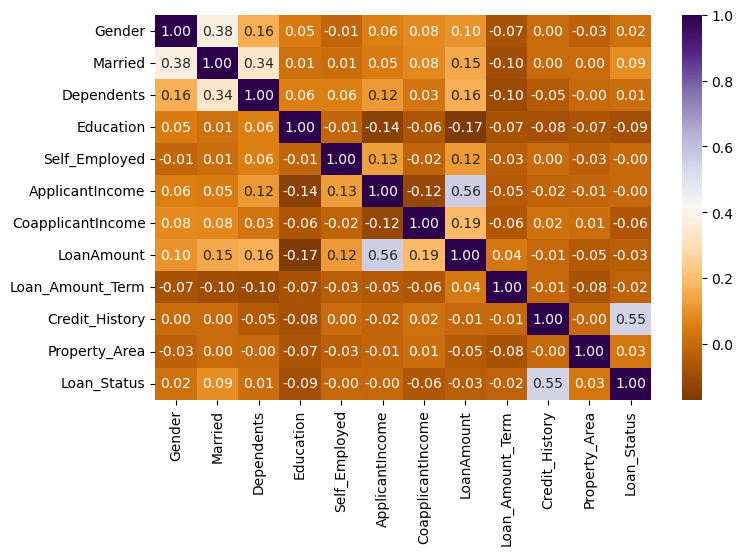

In [72]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot the Correlation matrix
plt.figure(figsize=(8, 5))
sb.heatmap(correlation_matrix, annot=True, cmap='PuOr', fmt='.2f')
plt.show()

### Target and independent variables

In [75]:
# Identify the target and independent variables
X = df.drop('Loan_Status', axis=1) # other independant features
Y = df['Loan_Status'] # target feature
Y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

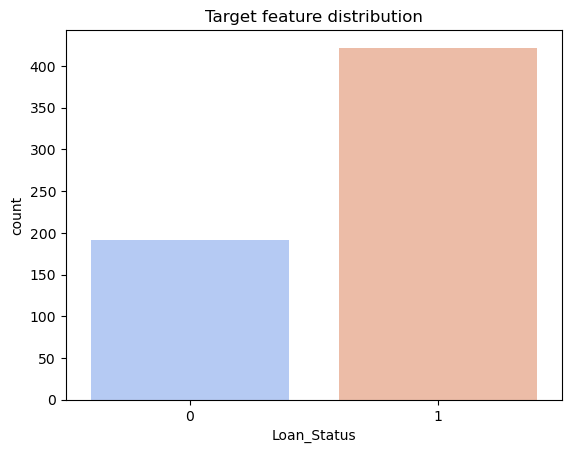

In [77]:
# Verify count for target feature to see if the problem is Balanced or Inbalanced
sb.countplot(df, x='Loan_Status', palette='coolwarm')
plt.title('Target feature distribution')
plt.xticks()
plt.show()

### SMOTE for balancing

In [80]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X, Y = smote.fit_resample(X, Y)
Y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

### Split data

In [83]:
from sklearn.model_selection import train_test_split

#Split the data into train and test set 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 675
Size of test data: 169


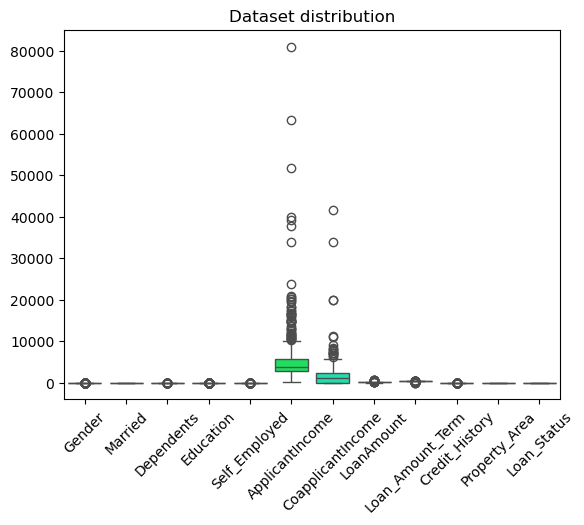

In [85]:
# Visualize the box plot for each column
sb.boxplot(data=df, palette='gist_rainbow')
plt.title('Dataset distribution')
plt.xticks(rotation=45)
plt.show()

### Feature Scaling

In [88]:
from sklearn.preprocessing import RobustScaler

# Perform Standard Scaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

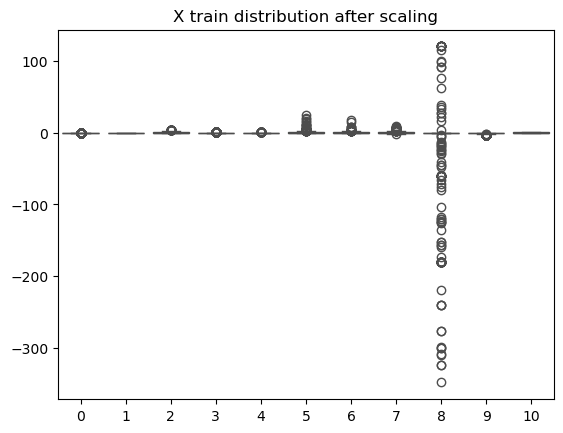

In [90]:
# Visualize the box plot after scaling for each column
sb.boxplot(data=X_train, palette='gist_rainbow')
plt.title('X train distribution after scaling')
plt.xticks()
plt.show()

## ML Modeling

### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_pred_rf = rf_clf.predict(X_test)

print("Accuracy score of Random Forest Classifier", metrics.accuracy_score(Y_pred_rf, Y_test))
print(classification_report(Y_test, Y_pred_rf))

Accuracy score of Random Forest Classifier 0.7928994082840237
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        94
           1       0.73      0.85      0.79        75

    accuracy                           0.79       169
   macro avg       0.80      0.80      0.79       169
weighted avg       0.80      0.79      0.79       169



In [96]:
Y_pred_rf

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

**Grid Search**

In [99]:
from sklearn.model_selection import GridSearchCV

# Implemented gridsearch
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': [None, 'sqrt', 'log2'], # Limits the number of features to consider when splitting a node. This helps control overfitting.
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
}

grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
print(grid.best_estimator_)

RandomForestClassifier(max_depth=20, n_estimators=200)


In [103]:
# Random Forest optimized
rf_grid = RandomForestClassifier(max_depth=20, n_estimators=200)
rf_grid.fit(X_train, Y_train)
Y_pred_rf_grid = rf_grid.predict(X_test)
print(f'Accuracy score of Random Forest Classifier with model grid: {accuracy_score(Y_test, Y_pred_rf_grid)}\n')

# Classification Report
target_names = ['Loan approved', 'Loan not approved']
print(classification_report(Y_test, Y_pred_rf_grid))

Accuracy score of Random Forest Classifier with model grid: 0.8047337278106509

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        94
           1       0.74      0.87      0.80        75

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.82      0.80      0.81       169



### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree optimized
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)

# Predict values
Y_pred_dt = dt_clf.predict(X_test)

# Decision Tree accuracy
dt_accuracy = metrics.accuracy_score(Y_pred_dt, Y_test)
print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:.4f}\n")

# Classification Report
print(classification_report(Y_test, Y_pred_dt, target_names=target_names))

Accuracy for Decision Tree Classifier: 0.7633

                   precision    recall  f1-score   support

    Loan approved       0.81      0.76      0.78        94
Loan not approved       0.72      0.77      0.74        75

         accuracy                           0.76       169
        macro avg       0.76      0.76      0.76       169
     weighted avg       0.77      0.76      0.76       169



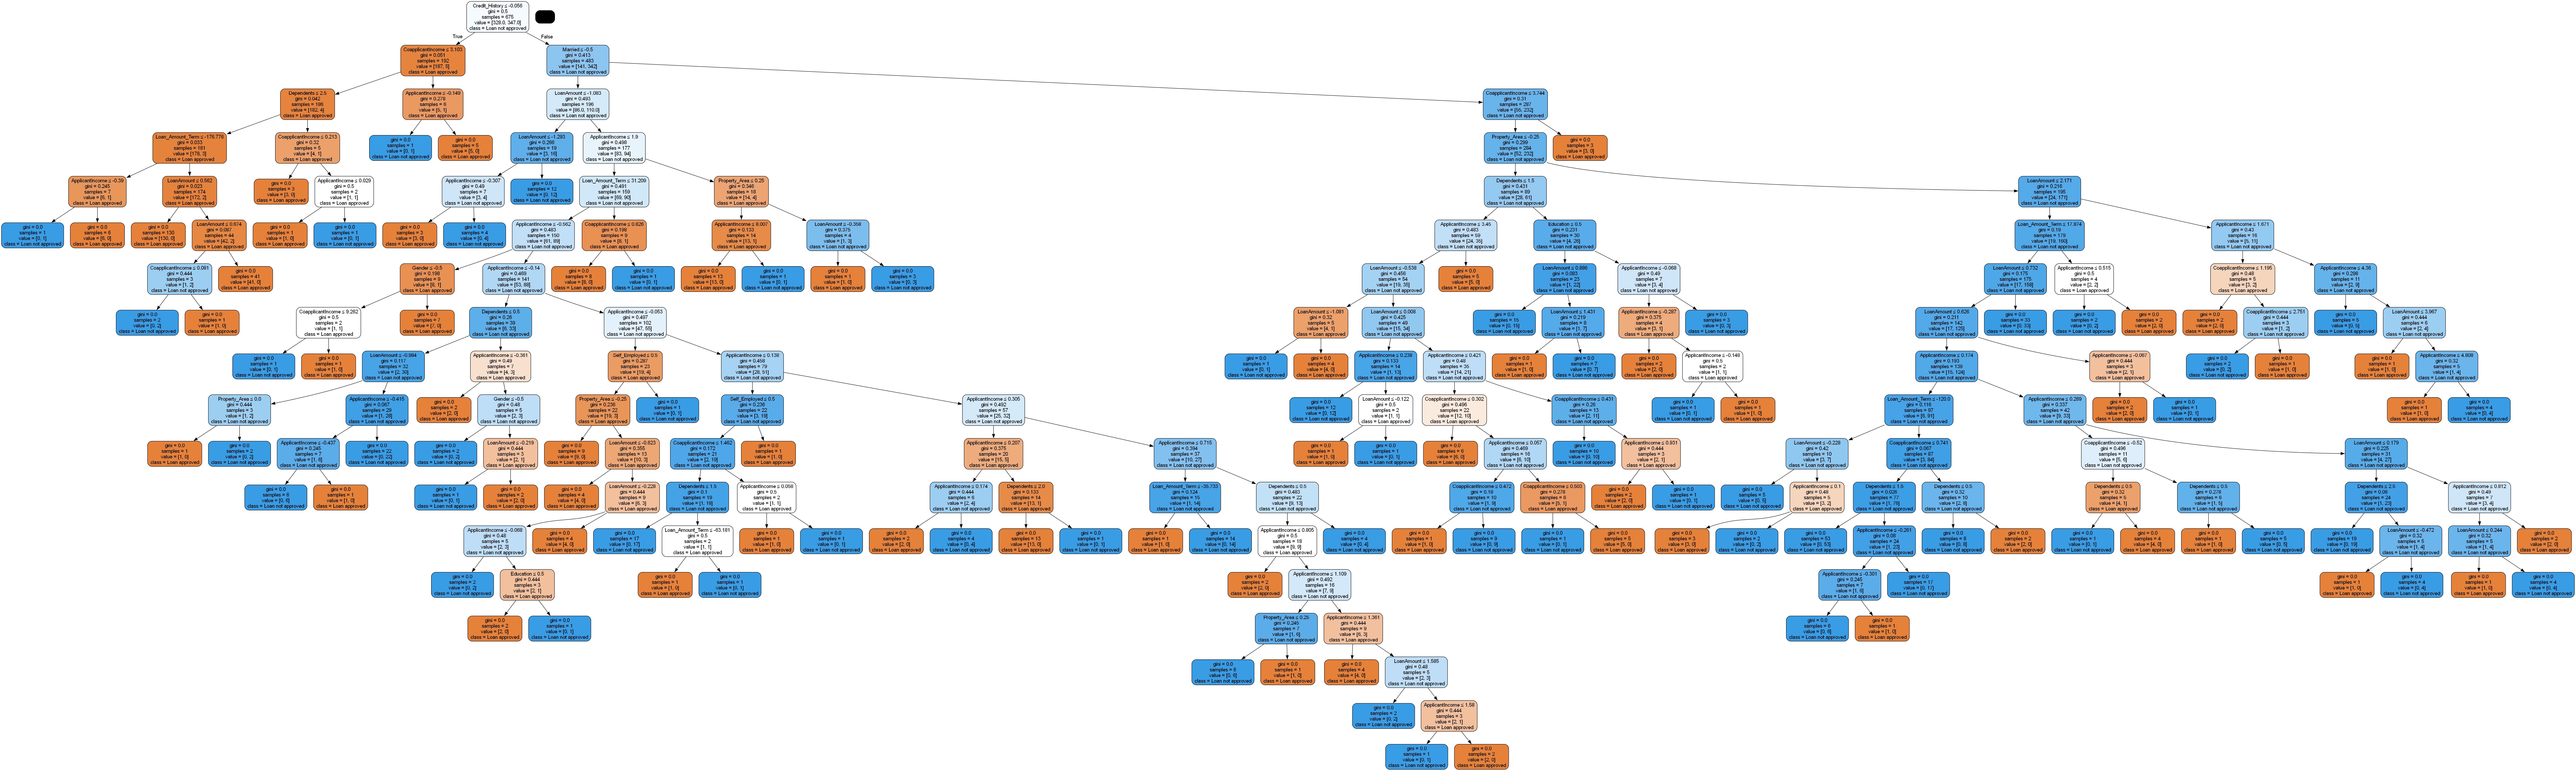

In [108]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Graph from decision tree
dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    filled=True, rounded=True, special_characters=True,
    feature_names=X.columns,
    class_names=target_names
    )

# Generate and display the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loan_prediction_dt_opt.png')
display(Image(filename='loan_prediction_dt_opt.png'))

**Grid Search**

In [111]:
from sklearn.model_selection import GridSearchCV

# Implemented gridsearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
print(grid.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=10, min_samples_split=10)


In [118]:
# Decision tree optimized
dt_clf_opt = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2', min_samples_leaf=10, min_samples_split=10)
dt_clf_opt.fit(X_train, Y_train)

# Predict values
Y_pred_dt_grid = dt_clf_opt.predict(X_test)

# Decision Tree accuracy
dt_accuracy = metrics.accuracy_score(Y_pred_dt_grid, Y_test)
print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:.4f}\n")

# Classification Report
print(classification_report(Y_test, Y_pred_dt_grid, target_names=target_names))

Accuracy for Decision Tree Classifier: 0.7929

                   precision    recall  f1-score   support

    Loan approved       0.87      0.73      0.80        94
Loan not approved       0.72      0.87      0.79        75

         accuracy                           0.79       169
        macro avg       0.80      0.80      0.79       169
     weighted avg       0.81      0.79      0.79       169



In [120]:
Y_pred_dt_grid

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

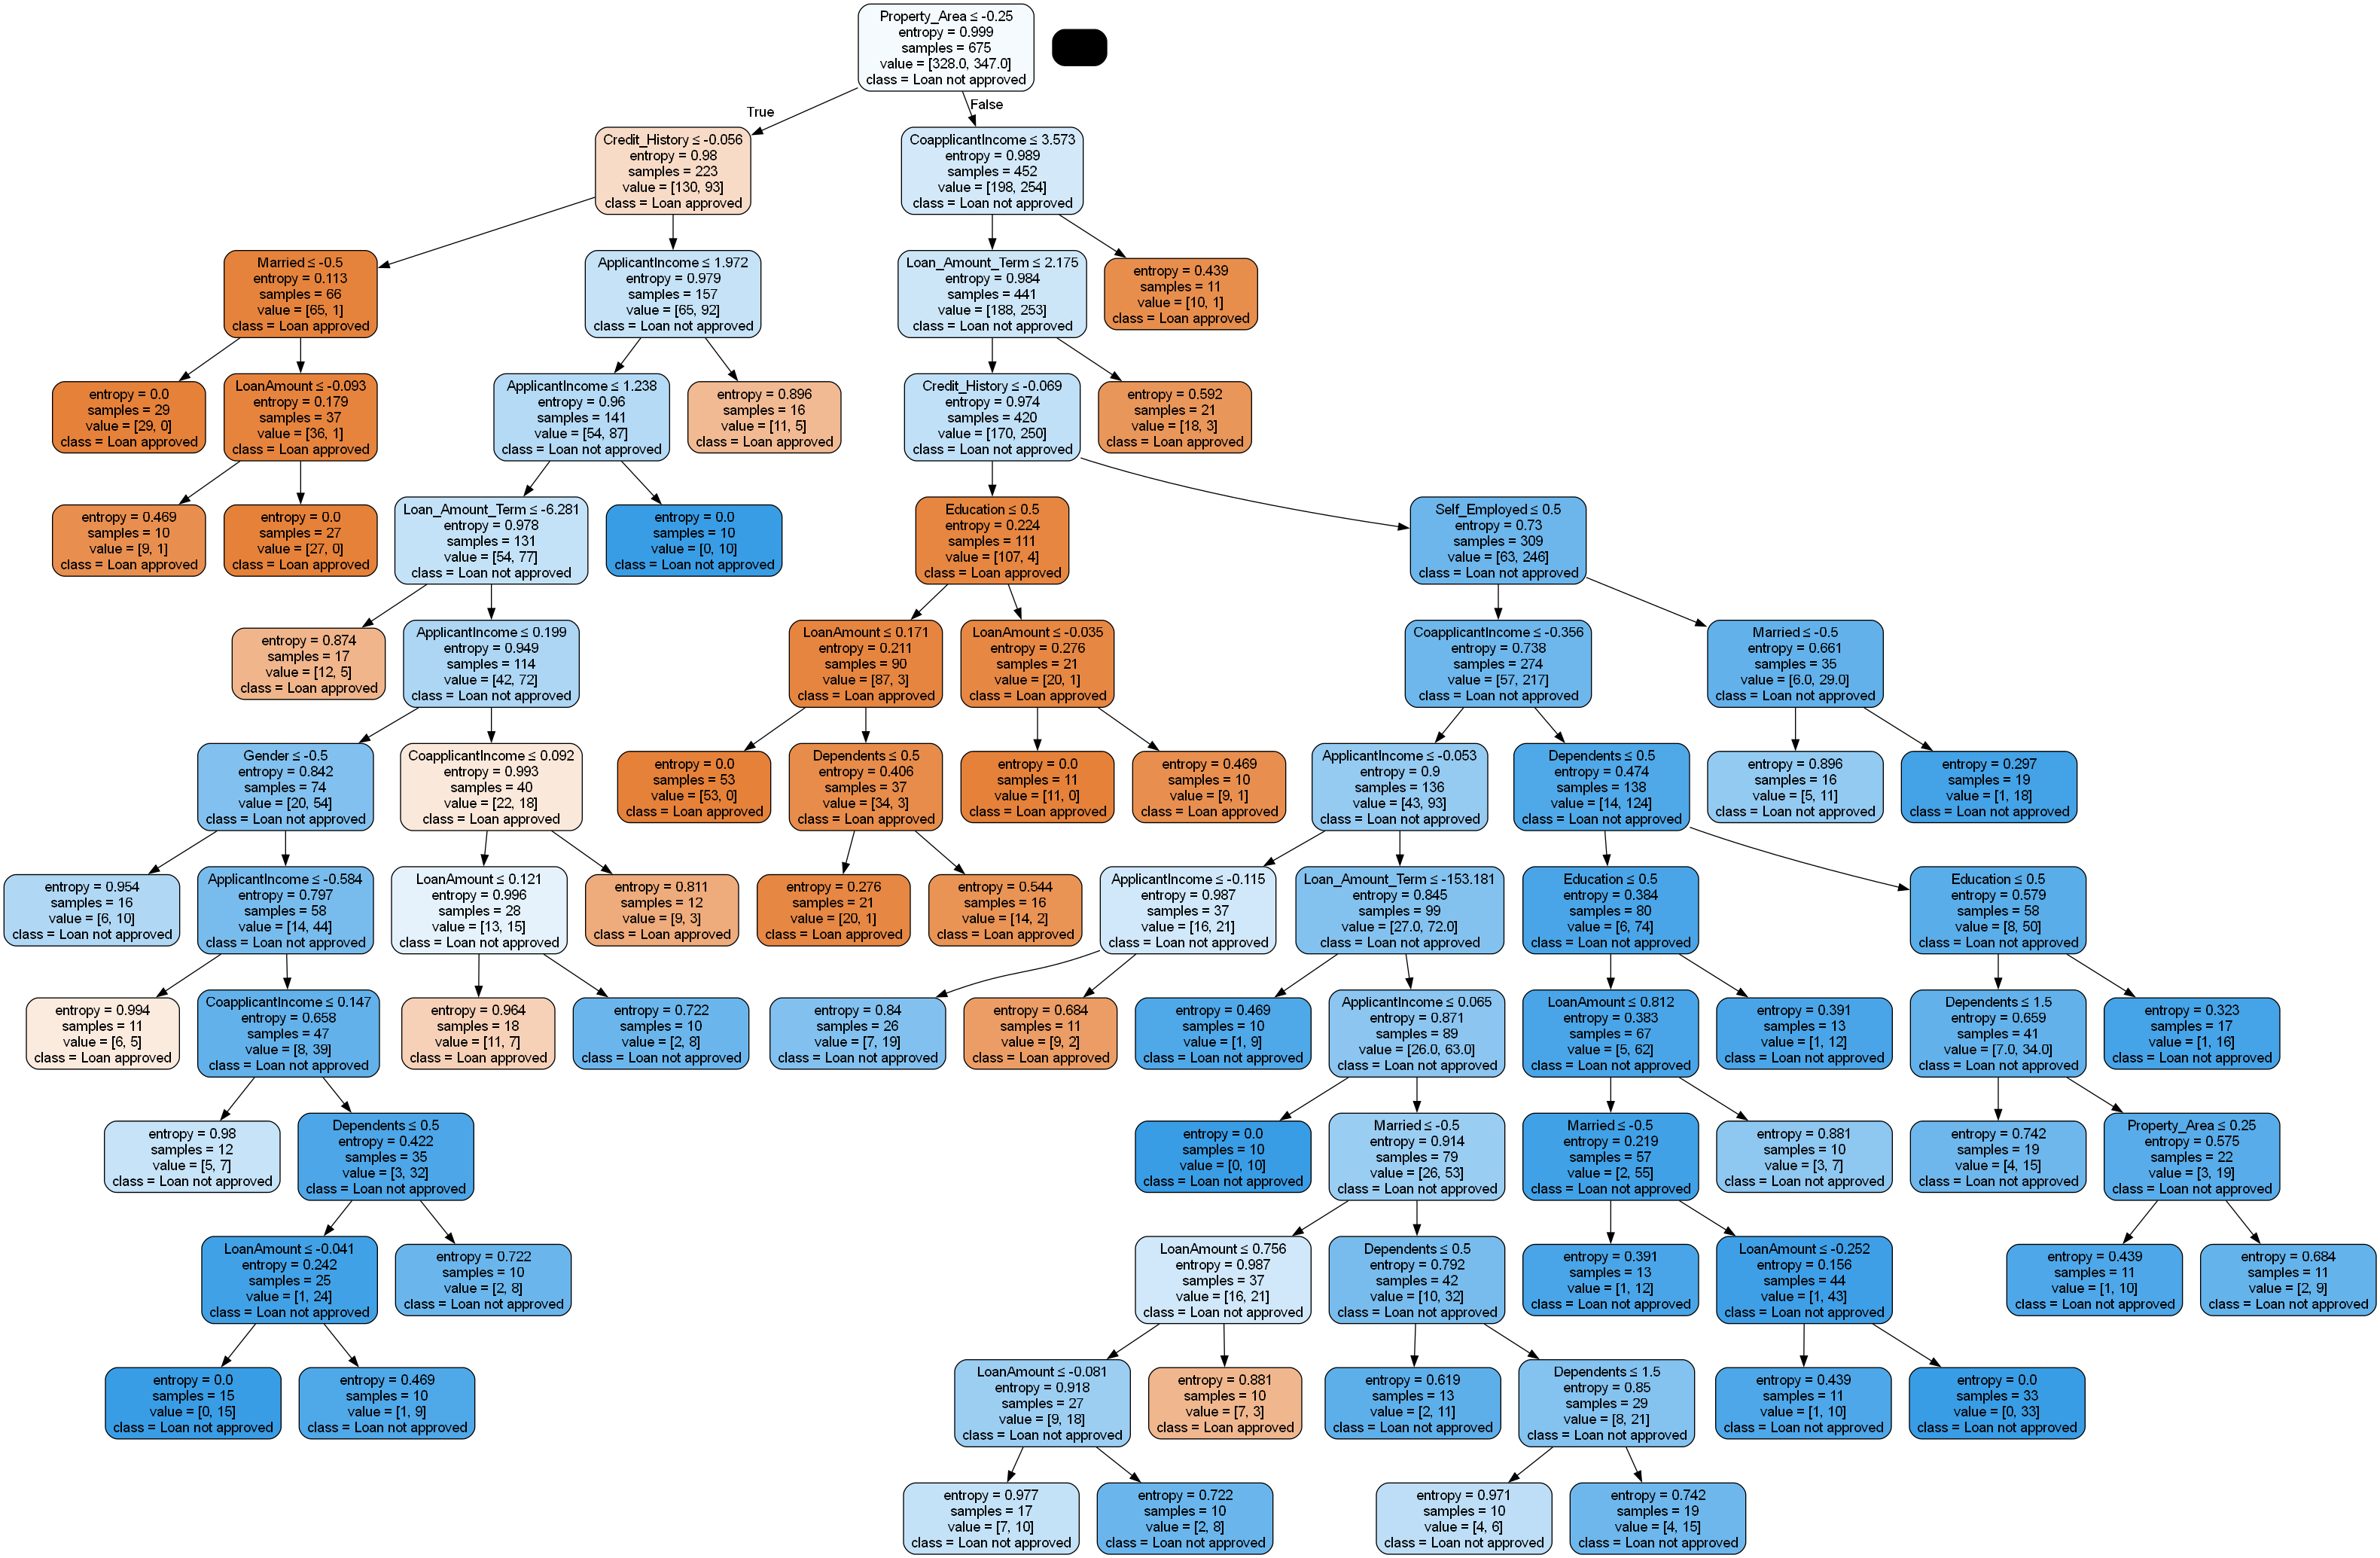

In [122]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Graph from decision tree
dot_data = StringIO()
export_graphviz(
    dt_clf_opt,
    out_file=dot_data,
    filled=True, rounded=True, special_characters=True,
    feature_names=X.columns,
    class_names=target_names
    )

# Generate and display the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loan_prediction_dt_opt.png')
display(Image(filename='loan_prediction_dt_opt.png'))

### KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

# performing KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)
print(f"The accuracy score of KNN is {accuracy_score(Y_test, Y_pred_knn)}\n")

print(classification_report(Y_test, Y_pred_knn))

The accuracy score of KNN is 0.7633136094674556

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        94
           1       0.70      0.83      0.76        75

    accuracy                           0.76       169
   macro avg       0.77      0.77      0.76       169
weighted avg       0.77      0.76      0.76       169



**Grid Search**

In [130]:
from sklearn.model_selection import GridSearchCV

# Implemented gridsearch
param_grid = {
    'n_neighbors': np.arange(1, 100, 2),  # Odd numbers to avoid ties
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean (for Minkowski metric)
}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
print(grid.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance')


In [132]:
# KNN optimized
knn_opt = KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance')
knn_opt.fit(X_train, Y_train)

# Predict values
Y_pred_knn_grid = knn_opt.predict(X_test)
print(f"The accuracy score of KNN is {accuracy_score(Y_test, Y_pred_knn_grid)}\n")

# Classification Report
print(classification_report(Y_test, Y_pred_knn_grid, target_names=target_names))

The accuracy score of KNN is 0.7692307692307693

                   precision    recall  f1-score   support

    Loan approved       0.83      0.73      0.78        94
Loan not approved       0.71      0.81      0.76        75

         accuracy                           0.77       169
        macro avg       0.77      0.77      0.77       169
     weighted avg       0.78      0.77      0.77       169



### AUC-ROC curve for all models

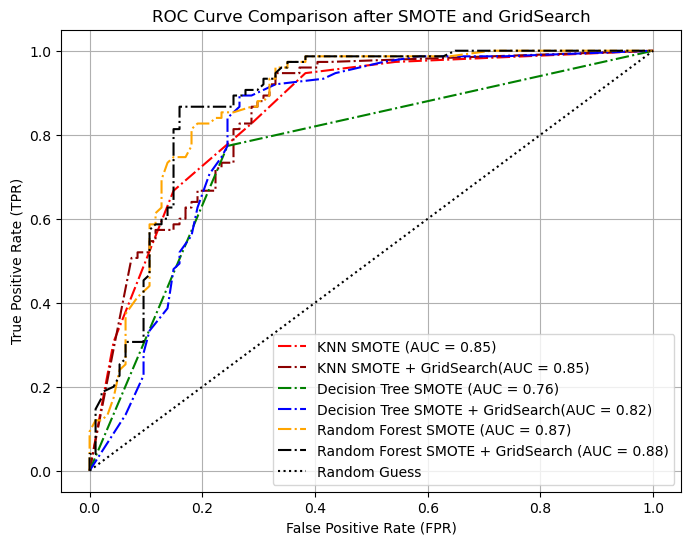

In [135]:
Y_rf_probs = rf_clf.predict_proba(X_test)[:, 1]
Y_knn_probs = knn.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clf.predict_proba(X_test)[:, 1]

Y_rf_g_probs = rf_grid.predict_proba(X_test)[:, 1]
Y_knn_g_probs = knn_opt.predict_proba(X_test)[:, 1]
Y_dt_g_probs = dt_clf_opt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf_grid, tpr_rf_grid, _ = roc_curve(Y_test, Y_rf_g_probs)
auc_rf_grid = auc(fpr_rf_grid, tpr_rf_grid)

fpr_knn_grid, tpr_knn_grid, _ = roc_curve(Y_test, Y_knn_g_probs)
auc_knn_grid = auc(fpr_knn_grid, tpr_knn_grid)

fpr_dt_grid, tpr_dt_grid, _ = roc_curve(Y_test, Y_dt_g_probs)
auc_dt_grid = auc(fpr_dt_grid, tpr_dt_grid)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashdot', label=f'KNN SMOTE (AUC = {auc_knn:.2f})')
plt.plot(fpr_knn_grid, tpr_knn_grid, color='darkred', linestyle='dashdot', label=f'KNN SMOTE + GridSearch(AUC = {auc_knn_grid:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree SMOTE (AUC = {auc_dt:.2f})')
plt.plot(fpr_dt_grid, tpr_dt_grid, color='blue', linestyle='dashdot', label=f'Decision Tree SMOTE + GridSearch(AUC = {auc_dt_grid:.2f})')
plt.plot(fpr_rf, tpr_rf, color='orange', linestyle='dashdot', label=f'Random Forest SMOTE (AUC = {auc_rf:.2f})')
plt.plot(fpr_rf_grid, tpr_rf_grid, color='black', linestyle='dashdot', label=f'Random Forest SMOTE + GridSearch (AUC = {auc_rf_grid:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison after SMOTE and GridSearch")
plt.legend()
plt.grid(True)
plt.show()

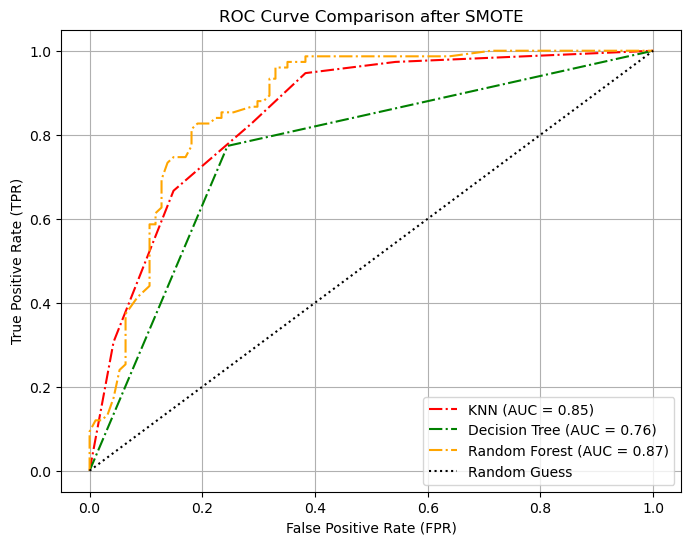

In [137]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashdot', label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='orange', linestyle='dashdot', label=f'Random Forest (AUC = {auc_rf:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison after SMOTE")
plt.legend()
plt.grid(True)
plt.show()

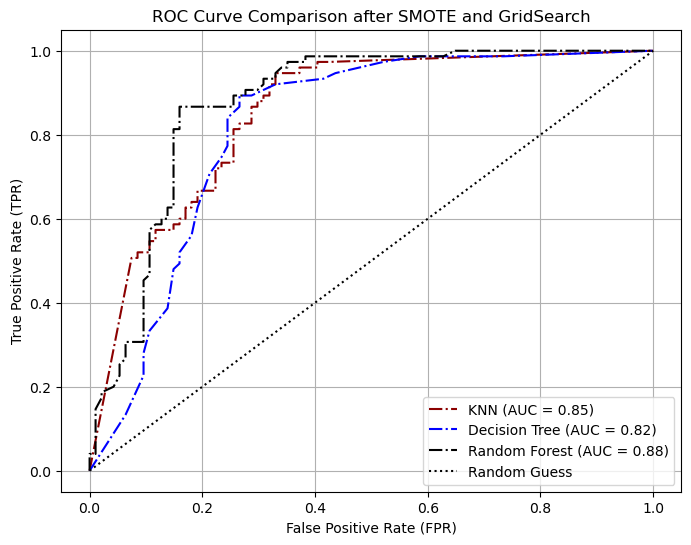

In [141]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_grid, tpr_knn_grid, color='darkred', linestyle='dashdot', label=f'KNN (AUC = {auc_knn_grid:.2f})')
plt.plot(fpr_dt_grid, tpr_dt_grid, color='blue', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt_grid:.2f})')
plt.plot(fpr_rf_grid, tpr_rf_grid, color='black', linestyle='dashdot', label=f'Random Forest (AUC = {auc_rf_grid:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison after SMOTE and GridSearch")
plt.legend()
plt.grid(True)
plt.show()